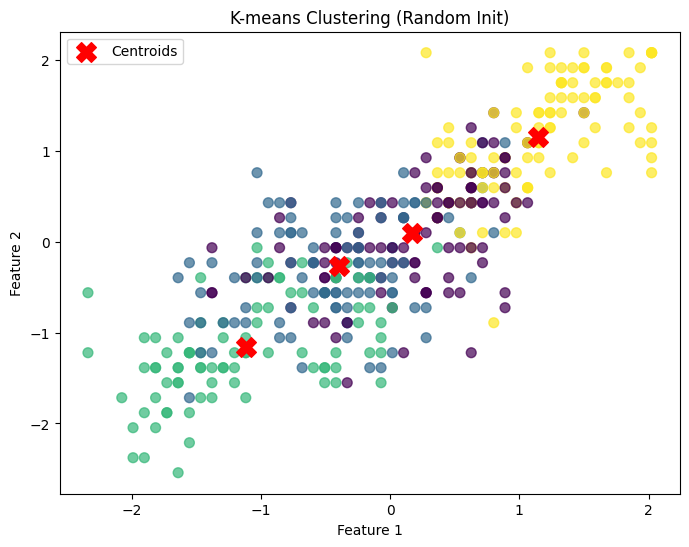

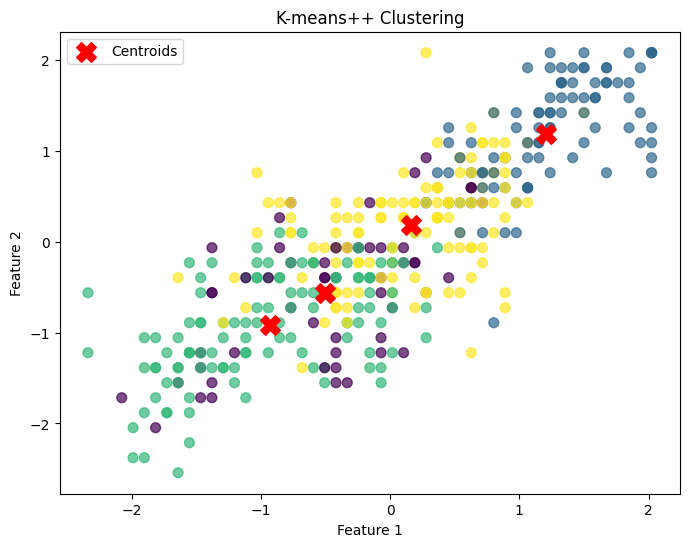

K-means (Random Init) Silhouette Score: 0.289
K-means++ Silhouette Score: 0.256
聚类结果已保存到 ..\temp\K-means++聚类.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 加载菜单数据
def load_menu_data(file_path):
    return pd.read_csv(file_path)

# 标准化数据
def preprocess_data(df, feature_columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[feature_columns])
    return scaled_data

# K-means 聚类
def apply_kmeans(data, n_clusters, init_method='random', random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=random_state)
    kmeans.fit(data)
    return kmeans

# 可视化聚类结果
def plot_clusters(data, labels, centroids, title="Cluster Visualization"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# 主程序
file_path = "..\\data\\Admission_Predict.csv"
menu_df = load_menu_data(file_path)

# 提取特征列
feature_columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA','Research']

# 数据预处理
scaled_data = preprocess_data(menu_df, feature_columns)

# 使用 K-means 进行聚类
n_clusters = 4  # 分为 n 类
kmeans_random = apply_kmeans(scaled_data, n_clusters, init_method='random')
kmeans_plus = apply_kmeans(scaled_data, n_clusters, init_method='k-means++')

# 打印聚类结果
menu_df['Cluster (K-means)'] = kmeans_random.labels_
menu_df['Cluster'] = kmeans_plus.labels_

# 可视化 (仅取前两列作为二维展示)
plot_clusters(scaled_data, kmeans_random.labels_, kmeans_random.cluster_centers_, title="K-means Clustering (Random Init)")
plot_clusters(scaled_data, kmeans_plus.labels_, kmeans_plus.cluster_centers_, title="K-means++ Clustering")

# 输出轮廓系数
silhouette_random = silhouette_score(scaled_data, kmeans_random.labels_)
silhouette_plus = silhouette_score(scaled_data, kmeans_plus.labels_)
print(f"K-means (Random Init) Silhouette Score: {silhouette_random:.3f}")
print(f"K-means++ Silhouette Score: {silhouette_plus:.3f}")

# 保存聚类结果
output_path = "..\\temp\\K-means++聚类.csv"
menu_df.to_csv(output_path, index=False)
print(f"聚类结果已保存到 {output_path}")
